# Seaborn Bonus | Pokemon Go Dataset Visualization

`Gotta Catch 'Em All`

https://www.kaggle.com/abcsds/pokemon/data

In [1]:
# Pandas for managing datasets
import pandas as pd
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
# Seaborn for plotting and styling
import seaborn as sns
sns.set()

### Step 1 Load Dataset

In [11]:
# Read dataset
df = pd.read_csv("C:/Users/daiji/Desktop/Pokemon.csv", encoding='latin1',index_col=0) # The argument 
                                            # index_col=0 simply means 
                                            # we'll treat the first column of the dataset 
                                            # as the ID column.

In [12]:
# Display first 5 observations
df.head(5)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [13]:
# some statistical summary of our dataset
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage
count,151.00000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,407.07947,64.211921,72.549669,68.225166,67.139073,66.019868,68.933775,1.582781
std,99.74384,28.590117,26.596162,26.916704,28.534199,24.197926,26.746880,0.676832
min,195.00000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000,1.000000
25%,320.00000,45.000000,51.000000,50.000000,45.000000,49.000000,46.500000,1.000000
50%,405.00000,60.000000,70.000000,65.000000,65.000000,65.000000,70.000000,1.000000
75%,490.00000,80.000000,90.000000,84.000000,87.500000,80.000000,90.000000,2.000000
max,680.00000,250.000000,134.000000,180.000000,154.000000,125.000000,140.000000,3.000000


### Step 2 Seaborn's Plotting Functions

One of Seaborn's greatest strengths is its diversity of plotting functions. For instance, making a scatter plot is just one line of code using the `lmplot` function.

There are two ways you can do so.
> The first way (recommended) is to pass your DataFrame to the data= argument, while passing column names to the axes arguments, x= and y=.  

> The second way is to directly pass in Series of data to the axes arguments.

For example, let us compare the Attack and Defense stats for our Pokémon:

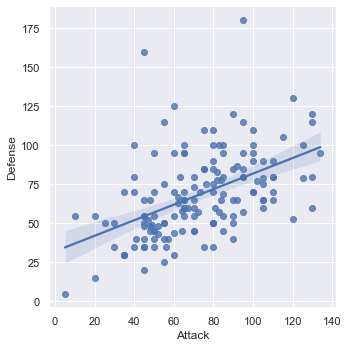

In [16]:
# Recommended way
sns.lmplot(x='Attack', y='Defense', data=df)
# Alternative way
# sns.lmplot(x=df.Attack, y=df.Defense)

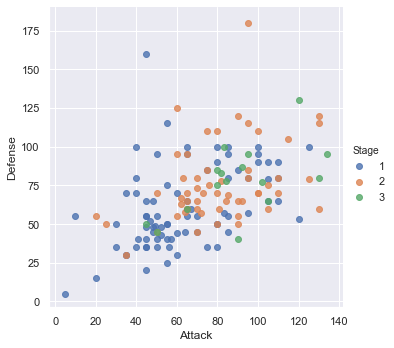

In [17]:
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage

Looking better by eliminating the regression line and chaing some colors! But we can improve this scatter plot further. For example, all of our Pokémon have positive Attack and Defense values, yet our axes limits fall below zero. Let's see how we can fix that...

### Step 3: Customize with Matplotlib

Remember, Seaborn is a high-level interface to Matplotlib. From our experience, Seaborn will get you most of the way there, but you'll sometimes need to bring in Matplotlib.

Setting your axes limits is one of those times, but the process is pretty simple:

> First, invoke your Seaborn plotting function as normal.

> Then, invoke Matplotlib's customization functions. In this case, we'll use its `ylim` and `xlim` functions.

(0, 142.0200544906389)

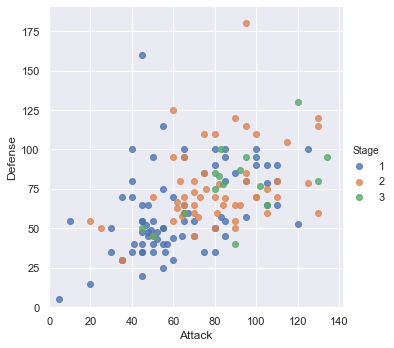

In [18]:
# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage')
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

### Step 4: Manipulate using Pandas

Pandas, as the stone for manipulating Dataframe, actually plays a very important role. You see, Seaborn's plotting functions benefit from a base DataFrame that's reasonably formatted. For example, let's say we wanted to make a box plot for our Pokémon's combat stats:

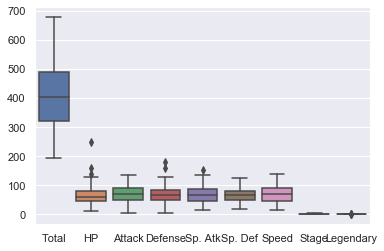

In [19]:
# Boxplot
sns.boxplot(data=df)

Well, that's a reasonable start, but there are some columns we'd probably like to remove:
> We can remove the Total since we have individual stats.

> We can remove the Stage and Legendary columns because they aren't combat stats.

It turns out that this isn't easy to do within Seaborn alone. Instead, it's much simpler to **pre-format your DataFrame**. 
Let's create a new DataFrame called `stats_df` that only keeps the stats columns:

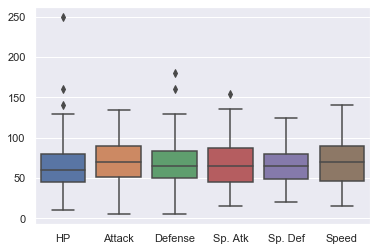

In [20]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)

### Step 5: Seaborn Themes

Another advantage of Seaborn is that it comes with decent style themes right out of the box. The default theme is called 'darkgrid'. Next, we'll change the theme to 'whitegrid' while making a **violin plot**.

> Violin plots are useful alternatives to box plots. They show the distribution (through the thickness of the violin) instead of only the summary statistics.

For example, we can visualize the distribution of Attack by Pokémon's primary type:

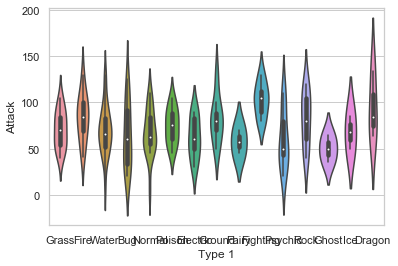

In [21]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df)

As you can see, Dragon types tend to have higher Attack stats than Ghost types, but they also have greater variance. Now, Pokémon fans might find something quite jarring about that plot: The colors are nonsensical. Why is the Grass type colored pink or the Water type colored orange? We must fix this!

### Step 6: Color palettes

Fortunately, Seaborn allows us to set custom color palettes. We can simply create an ordered **Python list** of color hex values.

In [22]:
#Let's use Bulbapedia to help us create a new color palette: 
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

Wonderful. Now we can simply use the `palette` argument to recolor our chart.

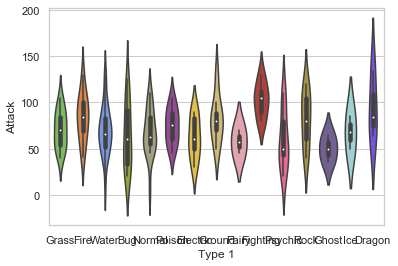

In [23]:
# Violin plot with Pokemon color palette
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette

Much better! 

Violin plots are great for visualizing distributions. However, since we only have 151 Pokémon in our dataset, we may want to simply display each point.

That's where the **swarm plot** comes in. This visualization will show each point, while "stacking" those with similar values:

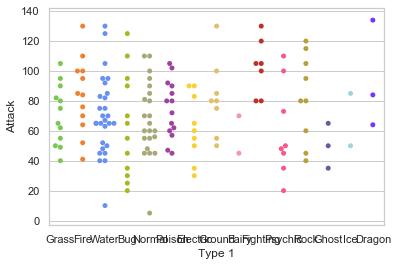

In [25]:
# Swarm plot with Pokemon color palette
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)

That's handy, but can't we combine our swarm plot and the violin plot? After all, they display similar information, right?

### Step 7: Overlaying Plots

It's pretty straightforward to overlay plots using Seaborn, and it works the same way as with Matplotlib. Here's what we'll do:
> First, we'll make our figure larger using Matplotlib.

> Then, we'll plot the violin plot. However, we'll set inner=None to remove the bars inside the violins.

> Next, we'll plot the swarm plot. This time, we'll make the points black so they pop out more.

>Finally, we'll set a title using Matplotlib.

Text(0.5, 1.0, 'Attack by Type')

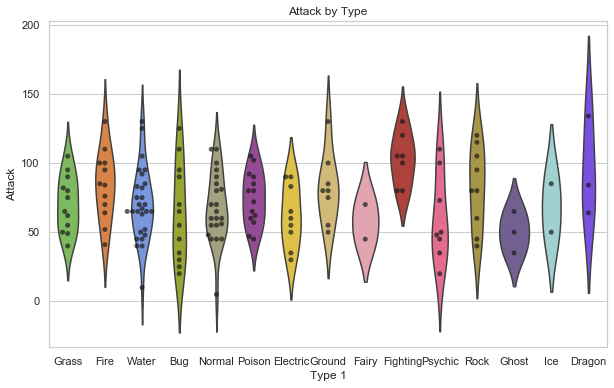

In [26]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

Awesome, now we have a pretty chart that tells us how Attack values are distributed across different Pokémon types. 

### Step 8: All Other Fun Charts

**9.1 - Heatmap**

Heatmaps help you visualize matrix-like data.

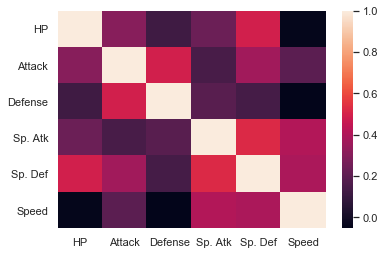

In [27]:
# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
sns.heatmap(corr)

**9.2 - Histogram**

Histograms allow you to plot the distributions of numeric variables.

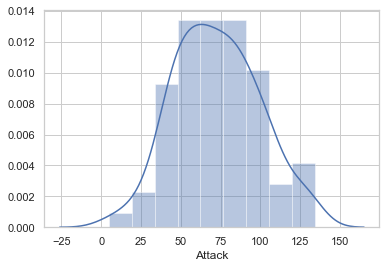

In [29]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Attack)

**9.3 - Bar Plot**

Bar plots help you visualize the distributions of categorical variables.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

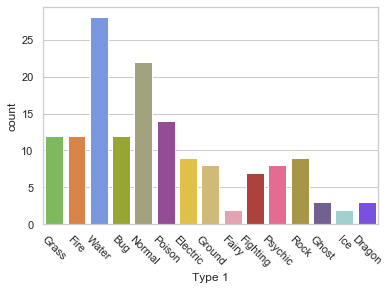

In [30]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

**9.4 - Factor Plot**

Factor plots make it easy to separate plots by categorical classes.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

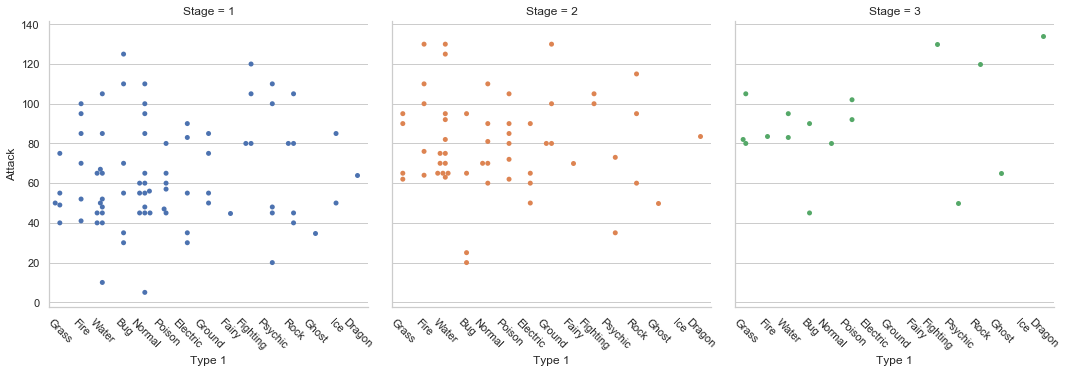

In [33]:
# Factor Plot
g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
plt.xticks(rotation=-45)

**9.5 - Density Plot**

Density plots display the distribution between two variables.

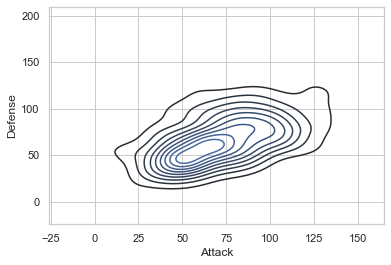

In [34]:
# Density Plot
sns.kdeplot(df.Attack, df.Defense)

**9.6 - Joint Distribution Plot**

Joint distribution plots combine information from scatter plots and histograms to give you detailed information for bi-variate distributions.

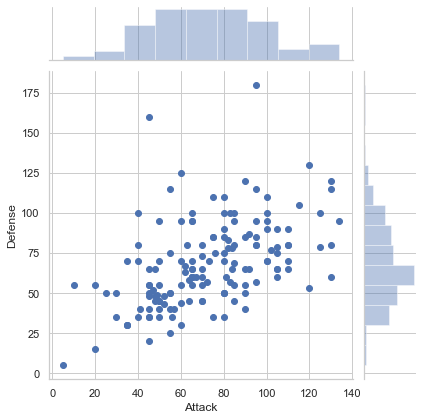

In [35]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df)

Yes!!! We did it!! `Gotta Catch 'Em All`